## <center>NYU CSCI-UA 9473 Introduction to ML </center>
   ### <center> Unsupervised Learning (Part I)</center>

<center>This week we will review some of the unsupervised learning models. Starting with the A priori algorithm, we will see how one can predict the probability of having customers simultaneously purchasing particular items from a grocery store or super market. We will then implement K-means and K-medoid and study how to determine the optimal value for K through the elbow method. We will implement the main Hierarchical clustering algorithms. Finally we will apply those algorithms to image segmentation and community detection.</center>

### Part I Market Basket Analysis

#### Market Basket analysis and the A priori algorithm

Market basket analysis works by grouping together items that are frequently purchased together. Download the following two grocery datasets from 

- The [github of Jose Zuniga](https://github.com/jzuniga123/SPS/blob/master/DATA%20624/GroceryDataSet.csv). 
- [Kaggle's Basketballoptimisation page](https://www.kaggle.com/shwetabh123/basketballoptimisation)

<img src="superMarketImage.jpeg" alt="Drawing" style="width: 300px;"/>

image credit:  [www.hybridexcellence.com](http://www.hybridexcellence.com/super-market-rack.aspx) 

Association rule analysis is powerful approach that is used to mine commercial databases. The idea is to find product that are often purchased simultaneously. If the customers are represented by a vector $\boldsymbol X\in \mathbb{N}^D$ (for ex. dummy encoding), where $D$ is the number of products that can be purchased, we then look for those entries in $X$ that often take the value $1$ simultaneously. 

For the two dataset above, we can represent the basket of each customer through a one hot encoding where we set the $(i,j)$ entry to $1$ is customer $i$ purchased any quantity of item $j$ (note that we could be more accurate and use additional binary variables to encode the exact quantity of each item that is being purchased). From this, the whole idea of Market Basket Analysis is to find subsets $\mathcal{K}$ of the indices $1, \ldots, num_items$ that maximize the probability

$$P\left[\bigcap_{k\in \mathcal{K}} (X_k = 1)\right] = P\left[\prod_{k\in \mathcal{K}} X_k = 1\right]$$

Given our encoding, we can replace the probability by its empirical version and try to find a subset $\mathcal{K}$ that maximizes the quantity

$$P_{emp} = \frac{1}{N_{cust}} \sum_{i\in cust} \prod_{k\in \mathcal{K}} X_{i,k}$$

where $X_{i,k}$ is the binary variable associated to customer $i$ and item $k$.

__Exercise II.1.1__ Represent each of the datasets above using an appropriate one hot encoding. 

In [ ]:
import numpy as np
# put your code here



__Exercise II.1.1 The A priori algorithm__

Running through all possible item sets ($2^{\text{num items}}$) can be intractable on large datasets. It is however possible to use efficient algorithms that lead to a substantial reduction reagrding the number of passes over the data they require. This is the case of the A priori algorithm. The algorithm proceeds as follows

- The first pass over the data computes the supports of all size 1 itemsets
- The second step computes the support of all size 2 itemsets that can be formed from pairs of the single itemsets that survived the first step.
- At the $k$ step (size $k$ itemsets), we only consider those size $k$ itemsets that are formed by an item set which appeared at the previous step together with a single item that as retained by step 1. 
- The itemsets with support less than the threshold are discarded. 

The key idea here is that we can focus our attention only on those itemsets of size $K$ for which all of the size $K-1$ subitemsets appeared at the previous step. That reduces the number of itemsets we need to consider and leads to a significant reduction in the computational cost.

In pseudo code, we have 

- Build all size one itemsets and store them in $S_1$

- for k=1,...desired size

    Go over all possible size K-1 itemsets $S_{k-1}$ and build the size K sets $S_k$ from $S_{k-1}$ and any elements from the size $S_1$ that are not alread in $S_{k-1}$ and such that all size $k-1$ subitemsets $S\subset S_k$ are in $S_{k-1}$

- Count the support and discard the itemset if the prevalence (i.e the empirical probability defined above) is lower than some threshold $t$.  

__Code the 'A priori algorithm' and apply it to the grocery datasets that you loaded above__. You can downsample those datasets if it makes it easier. 

In [ ]:
# put the code here



Once all the itemsets have been computed, they can be used to define association rules. For any two subsets, $A$ and $B$ of the item set $\mathcal{K}$, $A\cup B = \mathcal{K}$, one can define the total $T(A\Rightarrow B)$ to be the probability of observing the item set. and use $C(A\Rightarrow B)$ to encode an estimate of the posterior 

$$C(A\Rightarrow B) = P(A\Rightarrow B) = \frac{T(A\Rightarrow B)}{T(A)}$$

where $T(A)$ is the empirical probability of observing the item set $A$.

Together those two quantitities can be used to predict the items $B$ that a customer might want to purchase given that he bought the items in $A$. Or conversely, the items $A$ that are usually bought by customer that buy the items B. I.e. If we set thresholds $t$ on both $C(A\Rightarrow B)>t$ and $T(A\Rightarrow B)$ we could look for all transactions that have some proudct as consequent  and for which the probability estimates $C(A\Rightarrow B)$ and $T(A\Rightarrow B)$ are sufficiently large. 







### Part II: Clustering


##### Exercise 1.1. General K means

Consider the dataset given below. Implement the K means algorithm and run it on top of this dataset. 

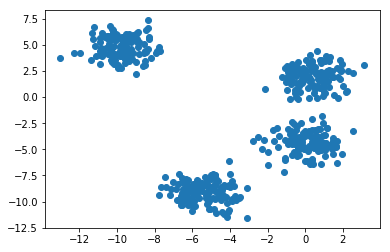

In [17]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers = 4,random_state=random_state)

plt.scatter(X[:,1], X[:,0])
plt.show()


def Kmeans(data, K):
    
    '''function should implement a simple K means clustering with random 
    initilization of the centroids. K is the number of clusters'''


    return 

##### Exercise 1.2. The Elbow method

Run your algorithm with a number of clusters $K=1,2,3,4,5,6,7,8,9$ and $10$. For each of those values, Compute the Within-Cluster-Sum of Squared Error (i.e. $E = \sum_{\mathcal{C}_k}\sum_{i\in \mathcal{C}_k} (c_k - x_i)^2$) then plot this error as a function of $K$. What do you notice?


##### Exercise 1.3. The importance of initialization

Extend your implementation of K means from the previous exercise so that it takes an additional argument specifying the initialization. You should contain implementations of each of the following approaches

- Random partitioning (the method starts from a random assignment of the points)
- Forgy (The method picks $K$ feature vectors at random and assign the remaining points to the nearest centroid)
- K means++ (see below)
- MacQueen (see below)
- Kauffman (see below)

In the Macqueen Approach proposed by MacQueen (1967), one chooses K instances of the database (seeds) at random. We then assign, following the instance order, the rest of the instances to the cluster with nearest centroid. After each assignment a recalculation of the centroids has to be carried out

In the Kauffman approach, we first select the most centrally located instance. Then for every non selected instance $x_i$ repeat the following steps:
   - For every non selected instance $x_j$ calculate $C_{ji} = \max(D_j -d_{ji},0)$ where $d_{ji} = \|x_i - x_j\|$ and $D_j = \min_{s} d_{sj}$. $s$ being one of the selected seeds
   - Calculate the gain of selecting $x_i$ as $\sum_{j} C_{ji}$
Select the not yet selected instance $x_i$ which maximizes $\sum_{j} C_{ji}$. If there are $K$ selected seeds then stop. Otherwise go to step 2. 

In K means++, we choose a center uniformly at random among the points. For each point $x_i$ from $\mathcal{D}$, compute the distance $D(x_i)$ between $x_i$ and the nearest centroid that has already been chosen. Choose a new point at random as the next center using a weighted probability distribution where a new point is chosen with probability proportional to $D^2(x_i)$. Repeat the steps until $K$ centers have been chosen.


In [ ]:
def Kmeans(data, initialization):
    
    '''function should implement K means clustering for each of the 
    initializations listed above'''





    return 

##### Exercise 1.4. Semisupervised: Constrained K means. 

Clustering is traditionally viewed as an unsupervised method for data analysis. In some cases however, information about the problem domain might be available in addition to the the data instances themselves. Within such a framework, one approach is to define so-called 'Must Link' and 'Cannot link'. The former referring to points that must be placed in the same cluster. The latter referring to points that cannot be placed in the same cluster. One can then extend K-means as follows

1. Let $C_1, \ldots C_K$ denote the initial cluster centers
2. For each point $x_i$ in the dataset $\mathcal{D}$, assign the point to the closest cluster $C_j$ such that the point does not violate any of the constraint. If no such cluster exist, return Failure
3. For each cluster $C_j$, update its center by averaging al the points $d_j$ that have been assigned to it
4. Iterate between (2) and (3) until convergence 
5. Return ${C_1, \ldots C_K}$

The constraint check can be carried out as follows. For every point $d_i$ in the dataset with closest cluster $C_j$, you need to check that for every $(d_i,d_k)$ in the set of all constraints, the constraint is satisfied. 

Apply this extension to the dataset below. setting as the 'Must link' a unique cluster for all the samples in consi and as 'Cannot link' a different cluster for the points in distinct consi, consj.

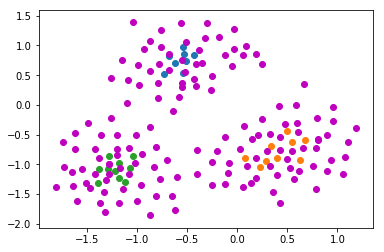

In [12]:
import scipy.io
import matplotlib.pyplot as plt

cluster1 = scipy.io.loadmat('cluster1.mat')['cluster1']
cluster2 = scipy.io.loadmat('cluster2.mat')['cluster2']
cluster3 = scipy.io.loadmat('cluster3.mat')['cluster3']

cons1 = scipy.io.loadmat('cons1.mat')['cons1']
cons2 = scipy.io.loadmat('cons2.mat')['cons2']
cons3 = scipy.io.loadmat('cons3.mat')['cons3']


plt.scatter(cons1[:,0], cons1[:,1])
plt.scatter(cons2[:,0], cons2[:,1])
plt.scatter(cons3[:,0], cons3[:,1])

plt.scatter(cluster1[:,0], cluster1[:,1], c='m')
plt.scatter(cluster2[:,0], cluster2[:,1], c='m')
plt.scatter(cluster3[:,0], cluster3[:,1], c='m')

plt.show()




##### Exercise 1.5. Image segmentation

K-means is commonly used in computer vision as a form of image segmentation. To each pixel of an image is associated its color described in RGB. The image to be segmented can then be represented as a set of points in a 3D data space. Consider the image below. By carefully initializing K means with the right number of clusters (and possibly merging subclusters), try to separate the parrot from the background. You might want to downsample the image

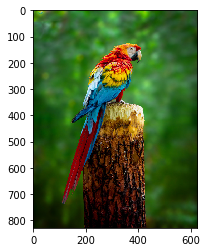

In [16]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('KmeansParrot.jpg')
imgplot = plt.imshow(img)
plt.show()

### Exercise 2. hierarchical clustering

##### Exercise 2.1. Agglomerative clustering

On the dataset below, implement and apply each of the agglomerative clustering approaches covered during the lectures. 

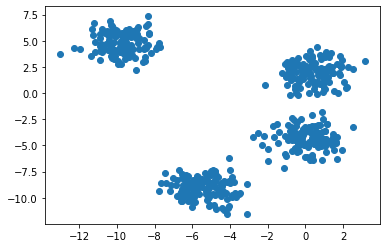

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers = 4,random_state=random_state)

plt.scatter(X[:,1], X[:,0])
plt.show()

In [ ]:

def Agglomerative_Clustering(data, Linkage, numClusters):
    
    
    '''function should implement agglomerative clustering with single linkage, complete linkage and 
    group average objective'''
    
    
    
    
    return clusters



def Divisive_Clustering(data, Linkage, numClusters):
    
    '''function should implement divisive clustering'''
    
    
    
    return clusters






### II.3. Detecting communities on facebook

__Exercise II.3.1__ Log on to the Stanford Network Analysis Project webpage and load the ['facebook_combined.txt' file ](https://snap.stanford.edu/data/egonets-Facebook.html)

In this exercise, we will cheat a little. Although K-means is, in general, absolutely not suited to perform community detection, we will use the embedding (i.e the projection) of the graph provided by the 'networkx' module to get 2D coordinates, and we will then use those coordinates as our feature vectors. Use the lines below to load and plot the facebook graph

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.read_edgelist('facebook.txt', create_using=nx.Graph(), nodetype=int)
print nx.info(g)

sp = nx.spring_layout(g)
nx.draw_networkx(g, pos=sp, with_labels=False, node_size=35)
# plt.axes('off')
plt.show()

__Exercise II.3.2.__ How many communities would you guess there are ? Initialize K means (first use the sklearn version) with 7 centroids. 